In [9]:
import numpy as np 
import random
import matplotlib.pyplot as plt

In [244]:
class particle_array():
    """
    Generates n number of particles. Used to calculate the following:
    1. Acceleration
    2. Velocity
    3. Displacement
    
    Methods
    1. __init__
        Takes in parameters n, dims and seed.
        n is the number of particles
        dims are refering to the boundaries which dictate where my particles are being generated in.
        seed refers to the seed number for which random is being used.
    
        self.mass: arbitrary value, self dictated
        self.grav: Newton's graviational constant
        self.particles: Creates a list of particles (refer to the next class)
    
    2. calc_accel:
        Calculates the acceleration of each particle and updates the particle itself.
        
    3. calc_veloc:
        Calculates the velocity of each particle and updates the particle itself.
    
    4. move:
        Particles are updated by one time step.
    """
    
    def __init__(self, n, dims, seed = 4):
        self.lbound = dims[0]
        self.ubound = dims[1]
        self.seed = random.seed(seed)
        self.mass = 10e18
        self.grav = 6.67* (10**-11)
        
        pPositions = []
        for i in range(n):
            pPositions.append(
                [random.uniform(self.lbound, self.ubound),
                 random.uniform(self.lbound, self.ubound),
                 random.uniform(self.lbound, self.ubound)])
        self.particles = [particle(pPositions[i], [0, 0, 0]) for i in range(n)] #This is a list of arrays
    
    def calc_accel(self, softening = 0.1):
        for particle_1 in self.particles:
            temporary = np.array([0,0,0]) #This resets the acceleration of my particle
            for particle_2 in self.particles:
                if id(particle_1) != id(particle_2):
                    dx = particle_1.p[0] - particle_2.p[0]
                    dy = particle_1.p[1] - particle_2.p[1]
                    dz = particle_1.p[2] - particle_2.p[2]
                    
                    denominator = (dx**2 + dy**2 + dz**2 + softening**2)**(-1.5)
                    
                    temporary[0] += self.grav * (dx * denominator) * self.mass
                    temporary[1] += self.grav * (dy * denominator) * self.mass
                    temporary[2] += self.grav * (dz * denominator) * self.mass
            particle_1.a = temporary
    
    def calc_veloc(self):
        for particle in self.particles:
            particle.d += particle.a * particle.dt / 2
    def move(self):
        for particle in self.particles:
            particle.p += (particle.d * particle.dt)

In [246]:
class particle():
    """
    Creates the attributes needed within a particle.
    
    Methods:
        p: 3d position vector
        d: 3d direction vector
        a: 3d acceleration vector.
        dt : time step used in the calculation
    """
    def __init__(self, position, direction):
        self.p = np.array(position, dtype = float)
        self.d = np.array(direction, dtype = float)
        self.a = np.array([0,0,0])
        self.dt = 0.01

In [240]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

#Creation of my particle
plot_particles = particle_array(n=50, dims=[-100,100])
duration = 1
dt = 0.01
table = {}
def memoize():
    global table, duration, dt
    step = 0
    while step <=duration:
        plot_particles.move()
        plot_particles.calc_accel()
        plot_particles.calc_veloc()
        temp = []
        for particle in plot_particles.particles:
            temp.append(list(particle.p))
        table[step] = temp
        step += dt
    return table
x= memoize()
print("complete")

complete


<IPython.core.display.Javascript object>


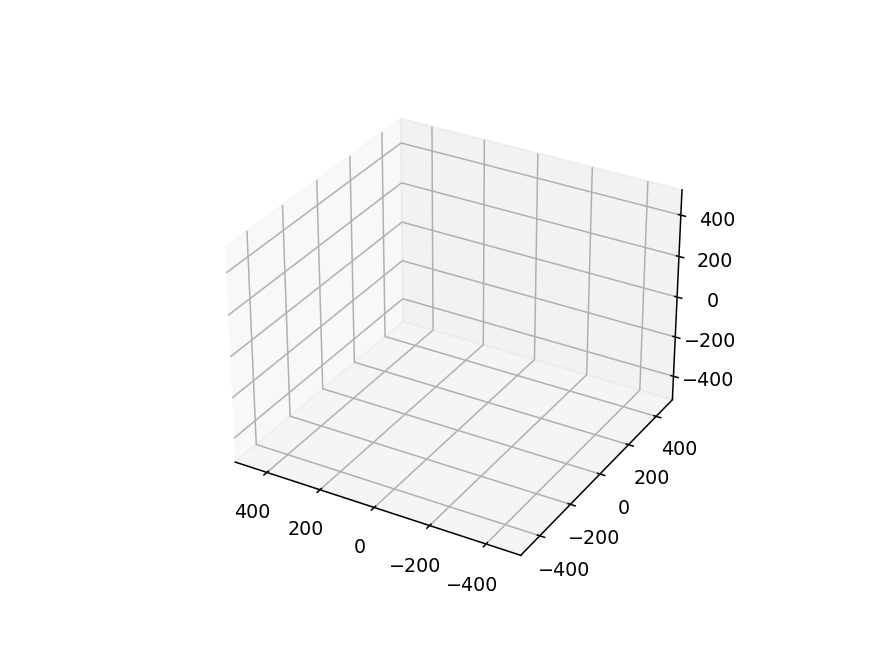

In [243]:
%matplotlib notebook
##############################################################
#The creation of my figure                                   #
fig = plt.figure()                                           #
ax = fig.add_subplot(111, projection='3d')                   #
#Creating a global variable scat to store particle positions #
scat = ax.scatter([], [], [])                                #
##############################################################

my_timer = 0
dt = 0.01

def init():
    """
    Creates my starting particle positions on the graph
    """
    ax.clear()
    ax.set_xlim3d([-500, 500])
    ax.invert_xaxis()
    ax.set_ylim3d([-500, 500])
    ax.set_zlim3d([-500, 500])
    scat = ax.scatter(
        [particle[0] for particle in table[my_timer]],
        [particle[1] for particle in table[my_timer]],
        [particle[2] for particle in table[my_timer]]
    )
    return scat,


def animate(frame):
    global my_timer, dt
        
    scat._offsets3d = (
        [particle[0] for particle in table[my_timer]],
        [particle[1] for particle in table[my_timer]],
        [particle[2] for particle in table[my_timer]]
    )
    my_timer += dt
    return scat,

#Interval here delays the time per frame shown
ani = FuncAnimation(fig, animate, frames=duration, init_func=init, blit=False, interval = 80)
plt.show()